# Assignment 2:
    test if the distribution of ages is the same for 
    
    1) male and female riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's

my usual imports and setups

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats

#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

# if this is true more orint statements are enabled for debugging
DEBUG = False

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# I am reading in data from January 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. You should use data from multiple months, joining multiple datasets, thus addressing systematic errors as well

In [2]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [3]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977,1


In [4]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977,1,2015-01-01 00:05:00


In [5]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# BY GENDER
splitting data by gender and extracting the age happens in the cell below

In [6]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [7]:
#dropping some data I no longer need
df.drop(['start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype'], 
        axis=1, inplace=True)
df.head()

,tripduration,starttime,stoptime,birth year,gender,date,ageM,ageF
0,1346,1/1/2015 0:01,1/1/2015 0:24,1960,2,2015-01-01 00:01:00,NaN,55
1,363,1/1/2015 0:02,1/1/2015 0:08,1963,1,2015-01-01 00:02:00,52,NaN
2,346,1/1/2015 0:04,1/1/2015 0:10,1974,1,2015-01-01 00:04:00,41,NaN
3,182,1/1/2015 0:04,1/1/2015 0:07,1969,1,2015-01-01 00:04:00,46,NaN
4,969,1/1/2015 0:05,1/1/2015 0:21,1977,1,2015-01-01 00:05:00,38,NaN


In [8]:
df.describe()

,tripduration,birth year,gender,ageM,ageF
count,285552.000000,279924.000000,285552.000000,227764.000000,52093.000000
mean,654.325583,1974.951419,1.162485,40.305272,38.951145
std,900.775928,11.574637,0.419490,11.595240,11.405112
min,60.000000,1899.000000,0.000000,16.000000,17.000000
25%,334.000000,1967.000000,1.000000,31.000000,30.000000
50%,504.000000,1977.000000,1.000000,39.000000,37.000000
75%,772.000000,1984.000000,1.000000,48.000000,48.000000
max,43023.000000,1999.000000,2.000000,116.000000,89.000000


In [9]:
# dropping nan values
df['ageM'].dropna(inplace = True)
df['ageF'].dropna(inplace = True)

In [10]:
df['ageM'].head()

1    52
2    41
3    46
4    38
6    43
Name: ageM, dtype: float64

In [11]:
df['ageF'].head()

0     55
5     46
7     30
27    19
43    26
Name: ageF, dtype: float64

Text(0.5,1,'female riders')

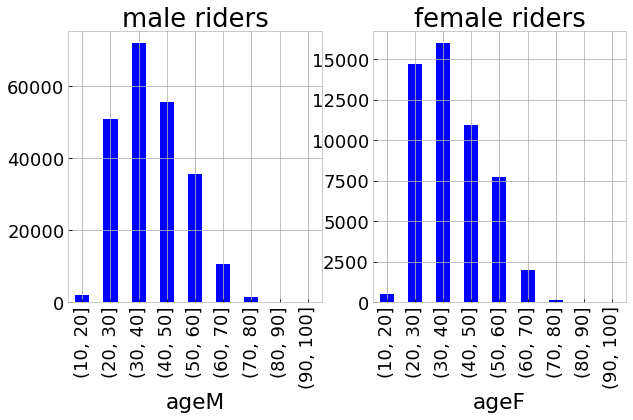

In [12]:
# plotting histograms 
ax = pl.figure(figsize = (10,5)).subplots(1,2)

bins = np.arange(10, 110, 10)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False, ax=ax[0])
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False, ax=ax[1])
axF.set_title("female riders")


           count_nonzero
ageM                    
(10, 20]        0.001657
(20, 30]        0.060955
(30, 40]        0.052146
(40, 50]        0.018657
(50, 60]        0.010957
(60, 70]        0.003203
(70, 80]        0.000188
(80, 90]        0.000075
(90, 100]            NaN


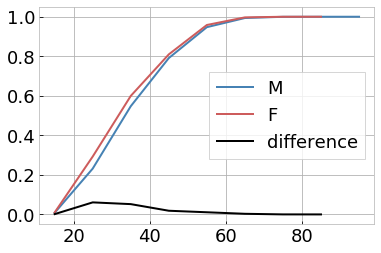

In [13]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")

pl.legend()

Figure 2: cumulative distribution of Citibike riders' ages split by gender (M for male, blue, F for female, red. The difference between the (normalized) cumulative distribution is also plotted (black)

## We use the KS tests to compare 2 samples and evaluate whether we can say if they are samples extracted from the same distribution. 

# I set a statistical significance of 0.05 (- 1 point if the alpha is not set)

# H0: The samples are drawn from the same parent distribution.  


In [14]:
alpha = 0.05

In [15]:
# and the male sample has unlikely values >70 years which i am removing

ks = scipy.stats.ks_2samp(df.ageM[df.ageM<70], df.ageF[df.ageF<70])
print (ks)

Ks_2sampResult(statistic=0.065918940291859407, pvalue=7.6250816882698752e-160)


In [16]:
def printRejection(ksp, pv):
    print ("the Null hypothesis that the samples come from identical distributions ")

    if ksp > pv: 
        print ("cannot be rejected")
    else: 
        print ("is rejected (p<{:.2f})".format(pv))
printRejection(ks[1], alpha)

the Null hypothesis that the samples come from identical distributions 
is rejected (p<0.05)


# I redo the test with a subsample of the data: take only 1 ride every of 200 

In [17]:
ks = scipy.stats.ks_2samp(df.ageM[::200], df.ageF[::200])
print (ks)
printRejection(ks[1], alpha)

Ks_2sampResult(statistic=0.084866404959650726, pvalue=0.088972534286789196)
the Null hypothesis that the samples come from identical distributions 
cannot be rejected


# Pearson's  test for correlation

From the docstring:

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.


Pearson's r (0.99751185808138121, 0.0)
Pearson's r with reducted data (0.99751185808138121, 0.0)


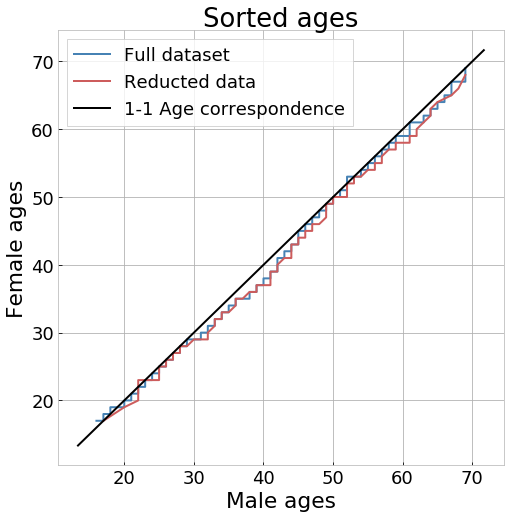

In [18]:
# the samples need to be cleaned off nan values 
# the samples need to be made to the same size. 
# The best option for that (least likely to bias the result) is to 
# choose Nf out of Nm values at random

np.random.seed(12345)
ageFsorted = df.ageF.sort_values()[df.ageF<70]
ageMsorted = np.sort(np.random.choice(df.ageM[df.ageM<70], len(ageFsorted), replace=False))
if DEBUG: 
    print (len(ageFsorted), len(ageMsorted))

r_P = scipy.stats.pearsonr(ageMsorted, ageFsorted)
print  ("Pearson's r" , r_P)

pl.figure(figsize=(8, 8))
pl.plot(ageMsorted, ageFsorted, label = "Full dataset")

# this was not explicitly asked but I am redoing the test with the smaller dataset

ageFsorted_short = df.ageF.sort_values()[df.ageF<70][::200]
ageMsorted_short = np.sort(np.random.choice(df.ageM[df.ageM<70][::200], len(ageFsorted_short), replace=False))

r_P = scipy.stats.pearsonr(ageMsorted, ageFsorted)
print  ("Pearson's r with reducted data" , r_P)

pl.plot(ageMsorted_short, ageFsorted_short, label = "Reducted data")

pl.plot(pl.xlim(), pl.xlim(), 'k-', label="1-1 Age correspondence")

pl.xlabel("Male ages")
pl.ylabel("Female ages")
title = pl.title("Sorted ages")
leg = pl.legend()

Figure 3: the samples are strongly correlated, as is obvious by the closeness of the Female vs Male age line to the 1-1 line (representing 1-1 correspondence between the male and femal age for each datum). The p value of 0 reflects this and indicates the extreme 
unlikelyness that uncorrelated system producing datasets that have a Pearson correlation 
at least as extreme as the one computed from these datasets. No comparison with the alpha threshold is made since the Pearson's correlation test only returns approximate p-values. (no points off if you did tho)
    

# Spearman's  test for correlation

In [20]:

r_S = scipy.stats.spearmanr(ageMsorted, ageFsorted)
print  (r_S)


SpearmanrResult(correlation=0.99913259035081159, pvalue=0.0)


The result of the Spearman correlation is consistent with that of the Pearson's test. The Spearman's test is superior in our case since the Pearson's test assumes Gaussianity, and we have not shown that the data distributions are normal.

The extremely low p-value indicates the extremely low probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. 

## TESTING THE AGE OF DAY AND NIGHT RIDERS
I am choosing day/night cuts as follows:

day:   5AM to 18PM trip start time

night: 18PM to 5AM trip start time


In [21]:
df['hour'] = df['date'].map(lambda ts: ts.hour)


In [22]:
dayrider = df[(df['hour'].values > 5) * (df['hour'].values < 18)]
nightrider = df[(df['hour'].values < 5) + (df['hour'].values > 18)]
ageD = 2015 - dayrider['birth year']
ageN = 2015 - nightrider['birth year']

Text(0,0.5,"Rider's fraction")

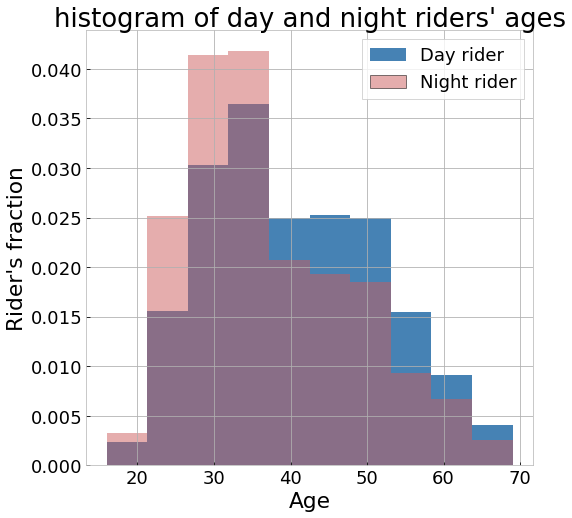

In [23]:
pl.figure(figsize = (8, 8))
h1 = pl.hist(ageD[ageD < 70], label = "Day rider", normed=True)
h2 = pl.hist(ageN[ageN < 70], label = "Night rider", normed=True, alpha = 0.5)
title = pl.title("histogram of day and night riders' ages")
leg = pl.legend()
pl.xlabel('Age')
pl.ylabel("Rider's fraction")

Figure 4. Normalized histogram of night and day riders' ages (corresponding to the sample PDF). There is a visible difference in the distributions (plotted differently to give you more options)

In [24]:
ks_dn = scipy.stats.ks_2samp(ageD[ageD < 70][::200], ageN[ageN < 70][::200])
print (ks_dn)

Ks_2sampResult(statistic=0.14848874848874855, pvalue=0.00019907024389148991)


In [25]:
printRejection(ks_dn[1], alpha)

the Null hypothesis that the samples come from identical distributions 
is rejected (p<0.05)


The distribution of day and night riders are sufficiently different than even with the reducted dataset (one ride out of every 200) we can see a difference in the KS test, where we failed to see it for male vs female riders. 